## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_table = pd.merge(mouse_metadata, study_results, on="Mouse ID") #, how="left")
# Display the data table for preview
merged_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
mice_demo = merged_table.loc[:, ["Mouse ID"]]
total_mice = mice_demo.count()[0]
pd.DataFrame({"Total mice": [total_mice]})

,Total mice
0,1893


In [21]:
merged_table = merged_table.drop_duplicates(subset=['Mouse ID','Timepoint'])
merged_table.head ()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
mice_count = len(merged_table["Mouse ID"].unique())
summary_table = pd.DataFrame({"Mice Count": mice_count}, index=[0])
summary_table = summary_table.loc[:,["Mice Count"]]
summary_table

,Mice Count
0,249


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Drug_mean = merged_table.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename("Mean")
Drug_median = merged_table.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename("Median")
Drug_variance = merged_table.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename("Standard Deviation")
Drug_stdv = merged_table.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename("Median")
Drug_sem = merged_table.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename("SEM")
summary_df = pd.DataFrame({"Mean": Drug_mean, "Median": Drug_median,
                           "Variance": Drug_variance, "Standard Deviation": Drug_stdv, 
                          "SEM": Drug_sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

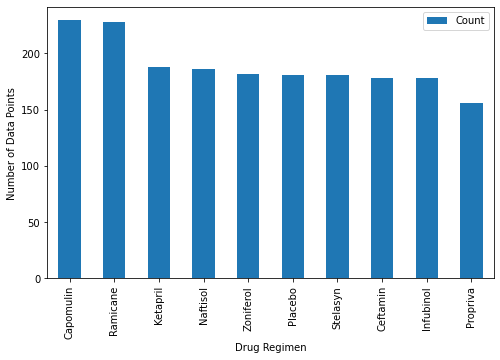

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

grouped_df = pd.DataFrame(merged_table.groupby(["Drug Regimen"]).count()).reset_index().sort_values(by='Mouse ID', ascending=False)
# Filter the DataFrame down only to those columns to chart
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID":"Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data
regimen_datapoints.plot(kind="bar", figsize=(8,5))

# Set a title for the chart
plt.ylabel("Number of Data Points")
plt.show()

<BarContainer object of 10 artists>

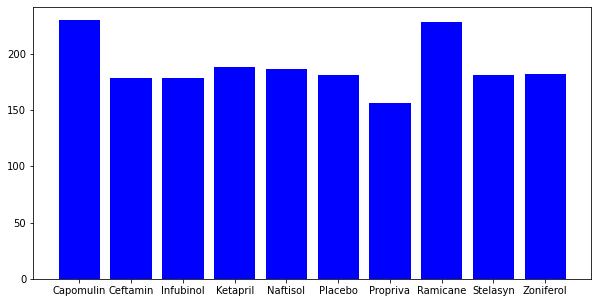

In [7]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

drug_regimens = summary_df.index.tolist()
regimen_count = (merged_table.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = drug_regimens
plt.figure(figsize=(10,5))
plt.bar(x_axis, regimen_count, color='b')#, align="center")

In [8]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

gender_df = pd.DataFrame(merged_table.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,930
1,Male,958


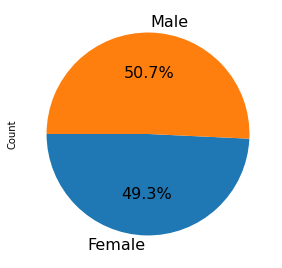

In [9]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

# plot chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
startangle=180, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

## Quartiles, Outliers and Boxplots

In [10]:
#Capomulin Regimen

sorted_df = merged_table.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]

In [11]:
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [13]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capomulin_df = merged_table.loc[merged_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [39]:
# Select the mouse.
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
cap_single_df 

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
196,371,l509,Capomulin,Male,17,21,0,45.000000,0
197,372,l509,Capomulin,Male,17,21,5,45.851193,0
198,373,l509,Capomulin,Male,17,21,10,46.759074,0
199,374,l509,Capomulin,Male,17,21,15,47.488599,1
200,375,l509,Capomulin,Male,17,21,20,48.070452,2
201,376,l509,Capomulin,Male,17,21,25,44.006257,2
202,377,l509,Capomulin,Male,17,21,30,44.708055,2
203,378,l509,Capomulin,Male,17,21,35,40.207289,2
204,379,l509,Capomulin,Male,17,21,40,40.770813,2
205,380,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0.5, 0, 'Timepoint (Days)')

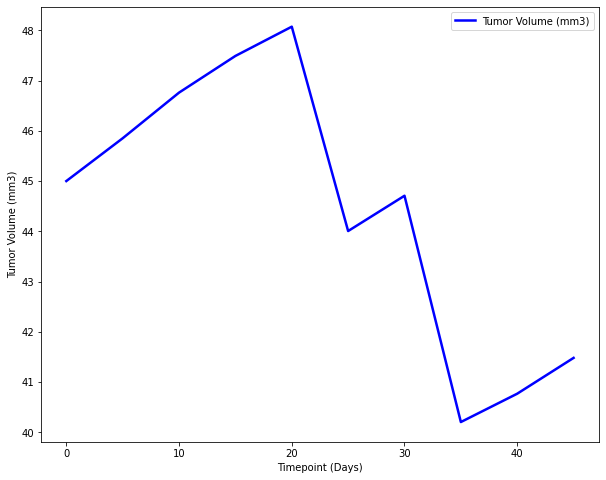

In [40]:
# Selecting only 2 columns
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")

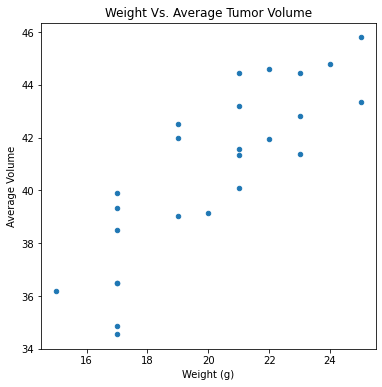

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 

reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap = average_cap.set_index('Mouse ID')
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", figsize=(6,6),
              title="Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient

mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


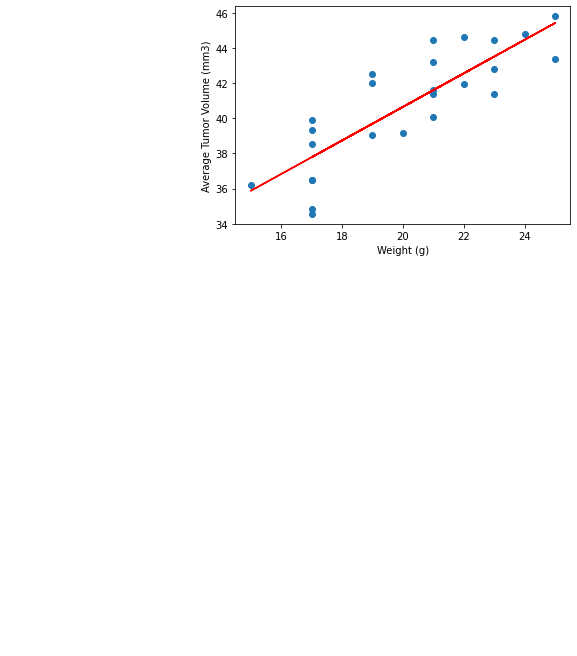

In [24]:
#linear regression model

x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()